In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-24.113405102362734 -145.76035980529895
78.2768504931424 55.541392922364366
-10.15997262376817 73.27456087086628
-29.37554566159696 133.70782314142258
-30.544415557200388 -52.33536219475104
80.1546784013284 151.0901123952587
83.18680826901655 -90.30317224801856
-39.844836715434056 34.213544212229465
-11.349421045620076 -117.09937163860944
-35.271201887865914 -61.625298334363336
-22.85165837398054 -57.356886407080864
45.70949622859675 48.31753102429181
-76.82960439127368 -79.74986657763444
-35.56199753426197 77.25635998113455
84.78614105960713 -30.657319441933026
8.531160895518227 136.93344119393623
-51.930023288619466 32.8831424012601
-67.43220566898277 -121.68852861964102
41.038522177255516 143.2476936408715
-64.24006022696781 21.466139030000363
-13.248110347962111 -51.145647161649805
13.430790373517127 -66.22949688498807
-50.60300264250847 138.37824612517664
-53.1278966384911 -40.10142851505424
-70.74469912170026 157.62942101489904
24.068894869949446 -130.5422910501672
5.566021016484

17.409576606846713 138.953407394157
88.59297115375449 28.32965785713614
54.622477603599236 -64.20995861932946
26.99462105620229 115.3228041343051
-26.378007215304862 -19.942704687904296
-49.10213890077527 -98.42614620461354
22.230684943103768 110.43821339787684
-9.177350124442953 159.74307462138808
0.806396665477223 -43.67543702066462
49.702946903630504 -65.99531416777253
-83.85088692432468 81.18676029565404
-56.139615336377545 -99.05000648277861
-52.58518490961395 -91.59045337852851
-27.889724789131108 60.45741748223679
49.63634065863113 100.89742059878046
40.30758541565561 61.08699224727329
-12.92423192174914 23.341438129390838
-79.05925240075607 -87.68393174160497
-12.418206253388163 -176.542485392641
-41.34675081103435 -57.75560982242311
51.932229323548114 -176.78661036663812
44.26375736836167 74.719854636691
79.25331956200628 -34.762395701073956
-0.7892529871813565 -35.44693333786887
-63.58859990788502 -163.25185895733537
68.16426475805517 69.71165601956537
-29.207125876913565 -70

24.852342851442316 -151.13358800724296
44.39424596956593 85.5176714393391
16.887898829231148 127.22099228301988
43.21715043851927 -16.986274818214355
10.227376260505409 144.6526708208213
-23.836644740813895 162.99292109837296
7.3097848525228954 -99.24954264986748
-55.76855540932381 -36.61136302860501
-83.97786144003086 166.0257002623929
43.330700475852666 -23.86037506846651
-44.72423242983241 -90.55372727287451
68.90547203438916 12.844686118561697
18.997181739854355 21.9012944759736
9.774485000967616 31.15076580013269
28.898524546101257 96.02962441815077
-84.79887654092104 -61.714318314582314
60.057767958138356 -77.40355320782895
-32.68212698233722 79.31948943131158
60.65801422478063 -48.66149309811365
55.93246451310023 -24.038567211752877
20.860617232384755 179.19980899383444
74.98127625040851 129.4054714435552
78.00319086855814 -105.50681046167252
-39.175362401542 -128.0615949431121
-45.82967195523333 169.9515588014276
-17.746815417972215 -175.50628834860623
16.432058515174106 -74.15

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [9]:
#Import requests and set URL
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(15)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | flinders
Processing Record 5 of Set 1 | encruzilhada do sul
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | lincoln
Processing Record 11 of Set 1 | puerto pinasco
City not found. Skipping...
Processing Record 12 of Set 1 | kirovskiy
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | shizunai
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | sao miguel do araguaia
Processing Record 21 of Set 1 | kralendijk
Process

Processing Record 38 of Set 4 | san quintin
Processing Record 39 of Set 4 | provideniya
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | coquimbo
Processing Record 42 of Set 4 | dikson
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | jamestown
Processing Record 45 of Set 4 | athabasca
Processing Record 46 of Set 4 | vanimo
Processing Record 47 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 4 | marang
Processing Record 49 of Set 4 | shunyi
Processing Record 50 of Set 4 | atbasar
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | doha
Processing Record 3 of Set 5 | chernyshevskiy
Processing Record 4 of Set 5 | shahr-e kord
Processing Record 5 of Set 5 | moshenskoye
Processing Record 6 of Set 5 | rio gallegos
Processing Record 7 of Set 5 | svetlogorsk
Processing Record 8 of Set 5 | poum
Processing Record 9 of Set 5 | tarnogskiy gorodok
Processing Record 10 of Set 5 | egvekinot
Processing Rec

Processing Record 30 of Set 8 | de-kastri
Processing Record 31 of Set 8 | nam tha
City not found. Skipping...
Processing Record 32 of Set 8 | cuiluan
Processing Record 33 of Set 8 | acarau
Processing Record 34 of Set 8 | vilhena
Processing Record 35 of Set 8 | salvador
Processing Record 36 of Set 8 | olenegorsk
Processing Record 37 of Set 8 | suleja
Processing Record 38 of Set 8 | olafsvik
Processing Record 39 of Set 8 | panacan
Processing Record 40 of Set 8 | henties bay
Processing Record 41 of Set 8 | karoi
Processing Record 42 of Set 8 | luwuk
Processing Record 43 of Set 8 | lundazi
Processing Record 44 of Set 8 | stutterheim
Processing Record 45 of Set 8 | wittstock
Processing Record 46 of Set 8 | magnolia
Processing Record 47 of Set 8 | nome
Processing Record 48 of Set 8 | ngunguru
Processing Record 49 of Set 8 | gat
Processing Record 50 of Set 8 | ekibastuz
Processing Record 1 of Set 9 | kununurra
Processing Record 2 of Set 9 | rongcheng
Processing Record 3 of Set 9 | vila velha


Processing Record 18 of Set 12 | aguimes
Processing Record 19 of Set 12 | santa rosa
Processing Record 20 of Set 12 | puerto ayacucho
Processing Record 21 of Set 12 | envira
Processing Record 22 of Set 12 | susanville
Processing Record 23 of Set 12 | port-gentil
Processing Record 24 of Set 12 | soyo
Processing Record 25 of Set 12 | craig
Processing Record 26 of Set 12 | ostrovnoy
Processing Record 27 of Set 12 | kaitong
Processing Record 28 of Set 12 | varhaug
Processing Record 29 of Set 12 | puerto quijarro
Processing Record 30 of Set 12 | kizilskoye
Processing Record 31 of Set 12 | talaya
Processing Record 32 of Set 12 | sofiysk
City not found. Skipping...
Processing Record 33 of Set 12 | corinto
Processing Record 34 of Set 12 | gizo
Processing Record 35 of Set 12 | obo
Processing Record 36 of Set 12 | klobuck
Processing Record 37 of Set 12 | saint andrews
Processing Record 38 of Set 12 | ulaanbaatar
Processing Record 39 of Set 12 | los llanos de aridane
Processing Record 40 of Set 1

In [13]:
len(city_data)

562

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,38.48,89,10,2.64,NZ,2022-07-03 21:54:06
1,Hithadhoo,-0.6000,73.0833,82.74,76,100,9.40,MV,2022-07-03 21:54:08
2,Flinders,-34.5833,150.8552,60.19,89,100,8.01,AU,2022-07-03 21:54:08
3,Encruzilhada Do Sul,-30.5439,-52.5219,51.62,94,100,7.40,BR,2022-07-03 21:54:09
4,Chokurdakh,70.6333,147.9167,53.65,87,100,11.12,RU,2022-07-03 21:54:09
5,Qaanaaq,77.4840,-69.3632,37.29,100,100,5.73,GL,2022-07-03 21:54:09
6,East London,-33.0153,27.9116,63.73,85,100,7.23,ZA,2022-07-03 21:54:10
7,Rikitea,-23.1203,-134.9692,75.29,71,0,16.22,PF,2022-07-03 21:54:10
8,Lincoln,40.8000,-96.6670,86.27,73,75,13.80,US,2022-07-03 21:51:58
9,Kirovskiy,45.0917,133.5136,71.02,92,28,4.61,RU,2022-07-03 21:54:11


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-07-03 21:54:06,-46.1927,168.8643,38.48,89,10,2.64
1,Hithadhoo,MV,2022-07-03 21:54:08,-0.6000,73.0833,82.74,76,100,9.40
2,Flinders,AU,2022-07-03 21:54:08,-34.5833,150.8552,60.19,89,100,8.01
3,Encruzilhada Do Sul,BR,2022-07-03 21:54:09,-30.5439,-52.5219,51.62,94,100,7.40
4,Chokurdakh,RU,2022-07-03 21:54:09,70.6333,147.9167,53.65,87,100,11.12
5,Qaanaaq,GL,2022-07-03 21:54:09,77.4840,-69.3632,37.29,100,100,5.73
6,East London,ZA,2022-07-03 21:54:10,-33.0153,27.9116,63.73,85,100,7.23
7,Rikitea,PF,2022-07-03 21:54:10,-23.1203,-134.9692,75.29,71,0,16.22
8,Lincoln,US,2022-07-03 21:51:58,40.8000,-96.6670,86.27,73,75,13.80
9,Kirovskiy,RU,2022-07-03 21:54:11,45.0917,133.5136,71.02,92,28,4.61


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

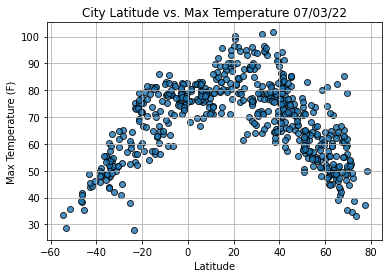

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

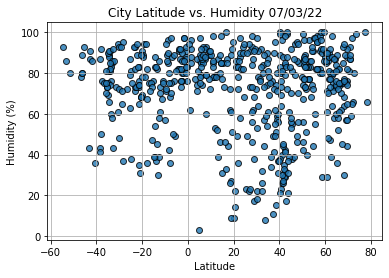

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

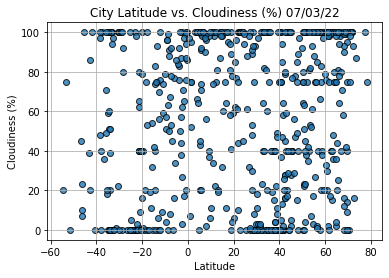

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

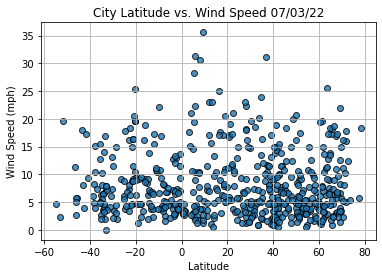

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                  Port Alfred
Country                        ZA
Date          2022-07-03 21:54:13
Lat                      -33.5906
Lng                        26.891
Max Temp                    59.18
Humidity                       83
Cloudiness                    100
Wind Speed                   1.99
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
557     True
558     True
559    False
560     True
561    False
Name: Lat, Length: 562, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Chokurdakh,RU,2022-07-03 21:54:09,70.6333,147.9167,53.65,87,100,11.12
5,Qaanaaq,GL,2022-07-03 21:54:09,77.4840,-69.3632,37.29,100,100,5.73
8,Lincoln,US,2022-07-03 21:51:58,40.8000,-96.6670,86.27,73,75,13.80
9,Kirovskiy,RU,2022-07-03 21:54:11,45.0917,133.5136,71.02,92,28,4.61
14,Shizunai,JP,2022-07-03 21:54:13,42.3339,142.3669,68.09,84,45,2.33


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

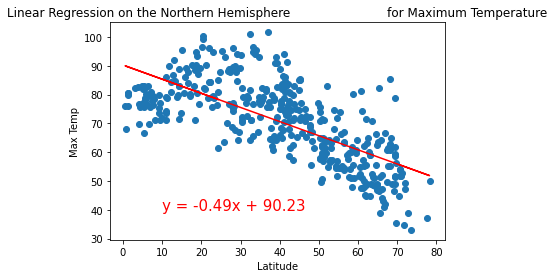

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))

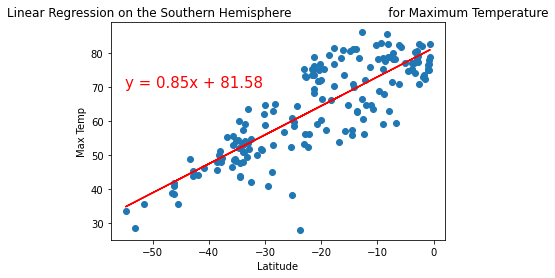

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,70))

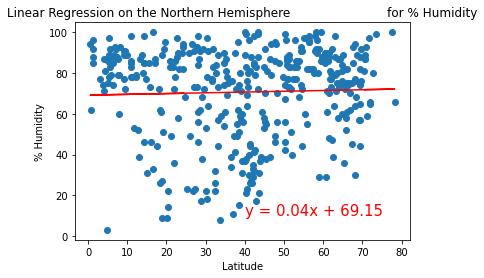

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

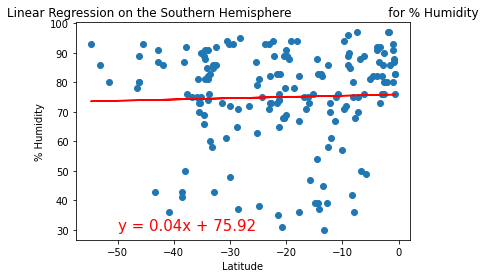

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

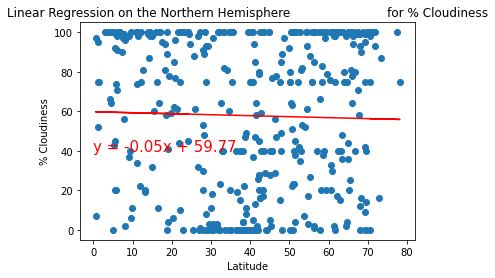

In [64]:
# Linear regression for cloudiness and latitudes on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,40))

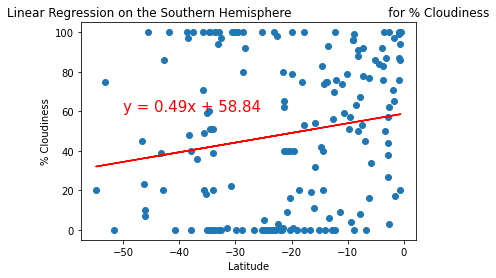

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

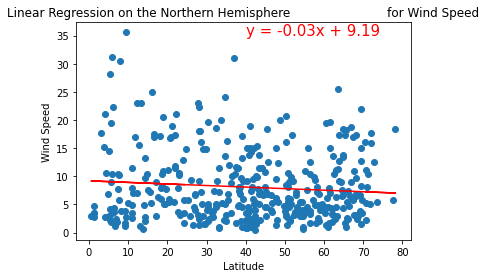

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

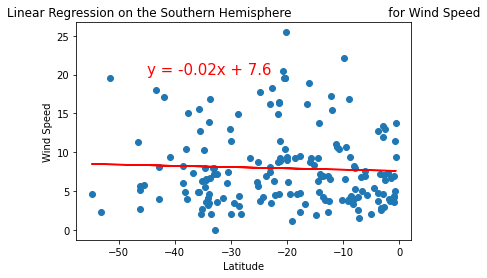

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-45,20))